# Lecture 2: Choice model fundamentals, estimation of binary choice models

----
----

In this lecture, we will:

* See the fundamental mathematical analysis of choice starting from data: the logit model.
* We will develop the model, starting from linear regression and then adding on top of it.
* Connect with the exisiting models in general statistical analysis.
* Connect the results of logit with the utility.

---
---




# Recap



* We have seen that we can describe preferences quantitatively by assigning a number to each alternative, the **utility** that the decision maker receives from choosing that alternative. Then we assume that decision makers always choose the alternative that has **maximum utility** from their choice set.
* We have seen that from some reasonable assumptions on preferences (completeness, transitivity), we can *always* find a function that maps from the alternative to their representative utility.
* In realistic situations, finding the exact function is unfeasible, so we add uncertainty in our model of reality.
 * We divide the utility into two components, the observed component, the one we can model, and the unobserved component: random component or error.

This view of choice modelling is called Random Utility Model (RUM) and the mathematical notation, for a decision maker $n$ and alternative $j$ is:

$$U_{nj} = V_{nj} + \varepsilon_{nj}$$

with $V_{nj}$ the observed utility for alternative $j$ for individual $n$, and $\varepsilon_{nj}$ the corresponding random component of the utility.

---
---



# Linear functions for the observed utility

The most fundamental way of capturing the observed component of the utility is through **linear relationships** from the observed variables of the choice:
 * the attributes of the alternatives
 * the socioeconomic characteristics of the individuals.

What is a linear relationship?

Lets go back to our example of the coffee shop. We simplify by assuming that we offer two products, latte and espresso. These are our two alternatives.
We suppose that only two factors are involved in the choice, only two factors influence the utility that indivuals derive:
 * Price of the coffee
 * Age of the individual

Intuitively we might think that the more expensive the alternative, the less utility people derive from choosing it. Lets assume for the purposes of illustration that the older the person the more they will lean towards espresso, it is an acquired taste (obviously this model is a gross oversimplification).

We can make that relationship very specific by saying it is a linear relationship. This means that the measured variables will be multipled by some numbers (the coefficients) and summed together to produce the observed component of the utility. Each coefficient multiplies one of the variables.
Lets call $\alpha$ the coefficient that multiplies the price, and $\beta$ the coefficient that multiplies age. We can assume that each alternative has its own coefficients, leading to the following formula for the observed utility:

 $$V_{nj} = \alpha_j \text{Price}_j + \beta_j\text{Age}_n$$

 This is an example of linear relationship, it is the same concept as linear models in Statistics (linear regression), Machine Learning and many other fields.

 **Linear models are extremely important:** They constitute the basic of our understanding and while might seem very limited (e.g. a simple linear relationship for how price affects utility), they can be made more general just by variable transformations (e.g.  $V_{nj} = \alpha_j \text{Price}_j + \gamma_j \text{Price}^2_j +\beta_j\text{Age}_n$ is also a linear model, but can express more complex relationships). In can be argued, informally, that relationships more complex that linear are turned into linear at some point of our internal 'thought process', we understand everything in terms of linear approximations.

We now have our first choice model, we only need to find good values for the coefficients, so they explain and predict the data well (as well as possible with this simple model). The process of finding the values for the coefficients from data is the **estimation of the model**.

---
---


# Estimation of Binary Choice models

The main difficulty of choice models is that we cannot use our classical methods such as statistical linear regression, because the dependent variable, the utility, is not observed, we do not have data for the $V_{nj}$. Most of the time, **we only observe whether they chose one alternative or the other**, which of the $J$ alternatives they chose. And because of randomness or limitations of our model, even that result is random, so the best we can do is try to capture choice probabilities.

We will first discuss the scenario of only two alternatives, in our running example of coffee, this would be only offering latte and espresso.
This simplifies things a lot and serves as a nice introduction to estimation.

The main reason behind the simplification: When we can only choose between two alternatives, if we can approximate the probability of choosing **one** of the alternatives, then the probability of choosing the other alternative is completely determined, so it is much more simple to explain and understand.
Say the probability of choosing Latte is $p$, then the probability of choosing espresso is $1-p$, because probabilities have to sum 1. If we have one of the probabilities, we do not need to think much about the other. If we had more that two alternatives, we would need to analyze one 'formula' for each alternative and then how they relate to each other.

This allows us to focus on modelling only the probability of one of the alternatives.

---
---

# Level 0: Estimating the linear model by least squares

Lets start with a way of estimation that we are all familar with, linear regression, or linear least squares.

Linear least squares requires the dependent variable to be numerical, but we do not have numbers, we only know whether indivudals chose latte or espresso.
In other words, our data looks like this:

| Choice      | Price | Age | Name |
| ----------- | ----- | ------ | -------|
| Latte      |  4    | 19 | Pablo |
| Espresso      |  3.5    | 21 | Fortuna |
| Espresso      |  3.0    | 32 | Andrew |
| Latte      |  3.5   | 20 | Jing |
| Espresso      |  3.0    | 28 | Jarif |


In our binary choice, we can easily turn this result into numbers by assigning the number 1 if the indivudal chose latte and 0 is they chose espresso.

|Choice Number | Choice      | Price | Age | Name |
|---| ----------- | ----- | ------ | -------|
|1| Latte      |  4    | 19 | Pablo |
|0| Espresso      |  3.5    | 21 | Fortuna |
|0| Espresso      |  3.0    | 32 | Andrew |
|1| Latte      |  3.5   | 20 | Jing |
|0| Espresso      |  3.0    | 28 | Jarif |


 * We could have chosen the other way around (1 for espresso and 0 for latte).
 * We could have chosen other arbitrary numbers, but the 0/1 option gives us an additional benefit. The interpretation of this number as the probability of choosing latte. For examples, some models use the +1 / -1 assignment.


## Fitting by least squares

We can estimate a linear model by out traditional linear least squares. To make things even more simple, lets consider a linear model that depends only on the age of the decision maker. Informally, we are trying to capture this relationship:

$$ \text{ChoiceNumber}_i = \beta \text{Age}_i + \text{some error}_i$$

Least squares means to find the $\beta$ that makes the sum of the squared errors as small as possible.

We can plot the relationship between the observed choice numbers and the age of the individuals in our dataset.

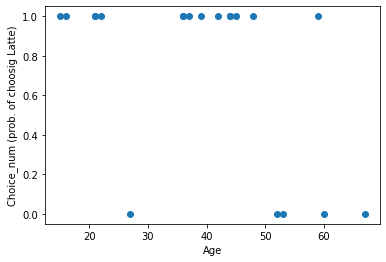

In [ ]:
#@title Plot: example of assigning numbers to choices
import numpy as np
from scipy.stats import logistic
import matplotlib.pyplot as plt
from sklearn import linear_model

np.random.seed(2021)
age = np.random.randint(15, 69, 20)
age = np.sort(age)
choice_probs = 1 - logistic.cdf(age * 0.12 - 6)
rolls = np.random.random_sample(len(choice_probs))
choice_num = (rolls < choice_probs) + 0

#plt.plot(age, choice_probs)
plt.scatter(age, choice_num)
plt.xlabel('Age')
plt.ylabel('Choice_num (prob. of choosig Latte)');


We can fit a linear least squares to this data

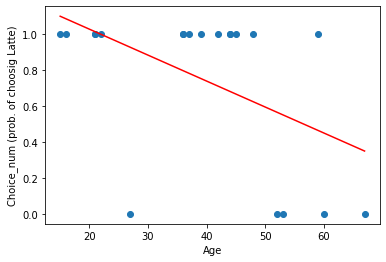

In [ ]:
#@title Plot of the linear least squares fit

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(age[:, np.newaxis], choice_num[:, np.newaxis])

preds = regr.predict(age[:, np.newaxis])

plt.scatter(age, choice_num)
plt.xlabel('Age')
plt.ylabel('Choice_num (prob. of choosig Latte)')
plt.plot(age, preds, c='red')


The value of the coefficient $\beta$ is:

In [ ]:
#@title
print('The value of the coefficient Beta: ', regr.coef_)

The value of the coefficient Beta:  [[-0.01440593]]


We can see the approximation.
If we interpret the output of the model as 'probability of choosing latte', there is a problem: the predictions go over 1 for ages under 20. This is not consistent with the idea of probability, that must be between 0 and 1.

 * Ignore the problem, if we get values over 1, we assume the probability is one.
 * Consider that values over 1 are actually impossible, so we could get a better model if we introduce that idea. We can try took look for a relationship that is not purely linear, use a model that is restricted to the [0,1] interval.

 ---
 ---

# Level 1: 'Squashing' through the logistic

A very common way of transforming any number to the interval [0,1] is to apply
the logistic function. The logistic is a 'S', also named 'sigmoid' that restrics its output to the range [0,1] while keeping the notion of order of the input (if $x$ is greater than $y$ in the input, the output of $x$ will also be greater.


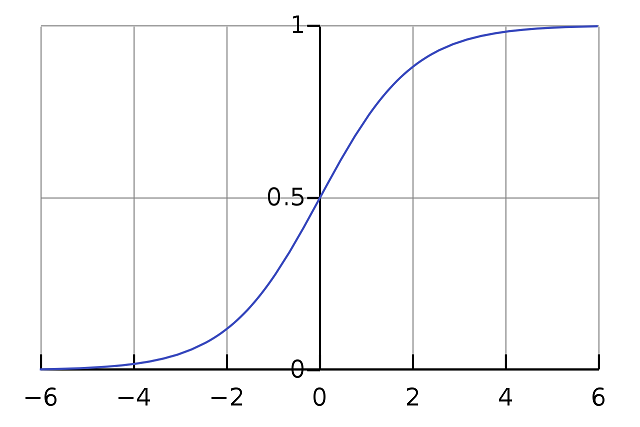

The function of the logistic

$$S(x) = \frac{e^{x}}{1 + e^{x}}$$

We want to squash the output of the linear combination to the interval [0,1]
we need to pass it through the sigmoid.

$$ \text{ChoiceNumber}_i = \frac{e^{\beta\text{Age}_i}}{ 1 + e^{\beta\text{Age}_i}}$$

Now we are sure that the output will be in the interval [0,1], but the model is no longer a linear relationship.


---
---

# Least squares estimaton of the logistic

When we do the squasing, there is no longer a linear relationship, it is nonlinear.  We cannot just plug the coefficients we obtained from the linear and
squash the output, we need to estimate proper values for the squashed version.
We can keep to the notion of "least squares fitting", this is, finding the value of the coefficents that make the predictions 'close' to the observed numbers. By 'close', it means that the squared difference between predictions of the model and the observed outcome is small.
In the following plot, in red the squashed version of the model, in pink the non-squashed version.

NOTE:' Least squares' fitting of the logistic squashed coefficients is not commonly applied in practice, we will see the 'maximum likelihood'.

2.2372815002344435


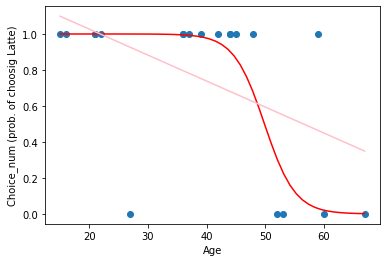

In [ ]:
#@title Code for fitting a sigmoid squashing of the linear model
from scipy.optimize import minimize

def sigmoid(x):
  return np.exp(x) / (1 + np.exp(x))

def err_beta(beta):
  return sum((sigmoid(age*beta + 19) - choice_num)**2)
err_beta = np.vectorize(err_beta)

beta_range = np.linspace(-10, 10, num=500)
errs = err_beta(beta_range)
#print(beta_range[np.argmin(errs)])
print(np.min(errs))


base = np.linspace(min(age), max(age))
preds_sig = sigmoid(beta_range[np.argmin(errs)]* base + 19)

plt.scatter(age, choice_num)
plt.xlabel('Age')
plt.ylabel('Choice_num (prob. of choosig Latte)')
plt.plot(base, preds_sig, c='red')
plt.plot(age, preds, c='pink')



---
---

# Interpretation of the logistic squashing as log-odds: The logit

The logistic squashing can be motivated from more fundamental principles, or at least it can be given an interpretation that it a bit more (not much) based on probability than the squashing. It is related to the concept of 'odds'.

Odds is a common way of comparing probabilities of two events.
It is common in betting, the odds of A against B, such as 2-to-1. Mathematically we define the odds as the ratio of the two probabilities, with the event of interest in the nominator.

$$\text{Odds} = \frac{P(A)}{P(B)}$$

It turns out that the linear relationship that gets squashed by the logistic function to the range [0,1] can be interpreted as the **logarithm of the odds.** So instead of just 'squashing', we are assuming that the logarithm of the odds follows a linear model of the variables (attributes and characteristics), but both interpretations are mathematically equivalent.

---
---



# Developing the relationship between log-odds and the logistic squashing

We are going to show how the logistic squaring emerges from the log-odds.
Roughly speaking, Why the logarithm of the odds?:
 * Linear models can create outputs in that are real numbers, usually we require that the dependent variable is a real number, with positive and negative values
 * When the dependent variable is not a 'real' number, we often apply a transformation
 * The odds turns probabilities between [0,1] to more general positive numbers [0,+$\infty$).
 * Then the logaritm transformation creates the full 'real number' $(-\infty,+\infty)$


Lets start by the probability of choosing latte:

$$ P(\text{Latte}) $$

Because we have two alternatives, we know that:

$$P(\text{Espresso}) = 1 - P(\text{Latte})$$

Then we can plug the formula for the odds, and simplify:

$$\text{Odds of Latte} = \frac{P(\text{Latte})}{P(\text{Espresso})} = \frac{P(\text{Latte})}{1 - P(\text{Latte})}$$

Recall the formula for the logistic:
$$S(x) = \frac{e^{x}}{1 + e^{x}}$$
we can divide nominator and denominator by $e^x$ to get an equivalent expression of the logistic:
$$ S(x) = \frac{1}{1 + e^{-x}}$$
If we interpred the output of the logistic squashing as a probability,
we get.

$$P(\text{Latte}) = \frac{1}{ 1 + e^{-\beta\text{Age}}}$$


Introduce the expression of $P(\text{Latte})$ from the logistic squashing in the formula for the odds $\frac{P(Latte)}{1 - P(Latte)}$.

$$\text{Odds of Latte} = \frac{ \frac{1}{ 1 + e^{-\beta\text{Age}}} }{1 - \frac{1}{ 1 + e^{-\beta\text{Age}}}}$$

Simplifying a bit (the denominator by $1 + e^{-\beta Age}$):
$$\text{Odds of Latte} = \frac{ \frac{1}{ 1 + e^{-\beta\text{Age}}} }{\frac{1 + e^{-\beta\text{Age}} - 1}{ 1 + e^{-\beta\text{Age}}}} = \frac{1}{e^{-\beta\text{Age}}} = e^{\beta\text{Age}}$$

If we take the logarithms of the odds, we reach the original 'linear relationship' with the variables.

$$\log(\text{Odds of Latte}) = \beta\text{Age}$$

And now we have a nice interpreatation of the logistic squashing, what we are doing is imposing a linear relationship for the logarithm of the odds of latte, not for the probability of latte.

---
---



#The logit function:

The **logit** function is defined as the inverse of the logistic:
$$\text{logit}(x) = \log \left( \frac{x}{1-x} \right)$$

You can see that if we interpret the x as the probability of event 'A' in a binary outcome experiment, we get that the logit is logarithm of the odds of event 'A'.

And there is where the name of the logit model comes from. The term logit model is the more popular in Econometrics. In Statisticis it is called logistic regression. In Machine Learning, we can call it a perceptron, a model for an artificial neuron.

---
---


# Level 2: Maximum likelihood estimation

We have seen that we can estimate the coefficients of the model by first assigning numbers to the outcome and fitting the function to those numbers by some method such as least squares. When the numbers assigned are 0 - 1, then we can think that the output of the model are probabilities.

But we once we have established that we want to do the logistic squashing to obtain probabilities, there are other ways of estimating the coefficients.
We are not forced to use least squares, we could be doing, for example least absolute value. The reason we used least squares in our example was to 'reuse' the technique that we know from basic statistics, least squares linear regression. However, in practiece the logit is not estimated by least squares.

We know from linear regression that least squares estimation concides with 'maximum likelihood estimation' when the noise is gaussian. We will revisit the concept on maximum likelihood estimation, and apply it to choices.

In the context of choice modelling (and other categorical response), there is a more 'natural' or 'principled' way of estimating the coefficients than least squares.

 Because we are outputting probabilities, we can think as the following question:

**What output probabilities are the most likely to have generated the data?**

Basically, we want to choose the values for the coefficients that produce choice probabilities. The values of the choice probabilites that most agree with the observed data are the ones that we will choose for our models.

To answer this question, we need to know the probability distribution family of the experiment (or at least find a good candidate distribution). In general, this is difficult (recall in linear regression, many times our data does not follow the linear + gaussian error).

 But in this case, there is not much doubt, every data point that we have is the result of a Bernoulli experiment. Every time someone makes a choice between two alternatives, considering that there is some randomness involved, we can model it with a $\text{Bernoulli}(p)$ with $p$ the parameter of distribution, the probability of success of the experiment. By success we can define one of the alternatives (we are choosing Latte in out recurring example).


$$P(\text{Latte}) = \frac{1}{ 1 + e^{-\beta\text{Age}}}$$

For the $i$-eth observation in our data, our model produces the the probability of observing latte for that observation.

$$P(\text{Latte}_i) = p_i = \frac{1}{ 1 + e^{-\beta\text{Age}_i}}$$

Imagine that for the $i$-eth observation, we have actually observed latte.
What is the most 'likely' value of $p_i$ that would have produced latte as outcome? The answer is simple, $p_i=1$. What is the value of $\beta$ that would have produced a $p_i=1$, it is a very large value, with $\beta = +\infty$ we will get $p_i=1$, but given the exponentiation, a value of 100 will be good enough.


\

Remember from the Bernoulli distribution, for $k=1$ is a success and $k=0$ the failure. In our case Latte is sucess, espresso is 'failure'.

$$B(k, p) = p^k(1-p)^{1-k} $$


The likelihood function of the coefficient $\beta$ can be defined as the probability that the given value of $\beta$ has generated the data.

When we have many observations, we get many output probabilities $p_i$ and to calculate the likelihood, we multiply all individual likelihoods, following the $P(A\cap B)= P(A)P(B)$ (when we have independent data).

\


When we have many independent observations, the joint probability is the product
of individual probabilities. For $N$ samples, when the probability of the Bernoulli can vary per sample, the probability of have observed the data is, in mathematical notation.

$$ L(\beta) = \prod_{i=1}^{N} p_i^{k}(1-p_i)^{1-k} $$

Likelihood function of the coefficient $\beta$ , when we plug in the expression for the $p_i$
$$ L(\beta)= \prod_{i=1}^{N} \left(\frac{1}{ 1 + e^{-\beta\text{Age}_i}}\right)^{k}\left(1-\frac{1}{ 1 + e^{-\beta\text{Age}_i}}\right)^{1-k}   $$

We want to find the $\beta$ that maximizes this likelihood, that it is why it is called maximum likelihood estimation.
We will not study the algorithm for finding the $\beta$ in this unit, we will use tools that have it implemented already. The way to find it is through mathematical optimization, for example, gradient descent.


**Maximum likelihood is the standard way of estimating the logit.**

Observed that we do not really need to do the squashing, but we risk getting absurd results is we do not limit the $p_i$ to be in [0,1].

---
---

# Going back to utilities: Recovering the utility from the logit model

To deliver the explanation of the logit we have momentarily ignored the part about utilities, we are modelling that.

It can be shown (we will see it later) that **under the logit, we can interpret the linear relationship that gets squashed as the observed component of the utility.**

The unobserved component is considered to come from a independent and identically distributed Gumbel distribution (also called Type 1 Extreme value).
Linking logistic regression to the fundamental theory of utility, showing that the statistical model is consistent with the underlying theory of utility, is part of why Daniel McFadden received the Nobel prize.

Under the logit:
$$U_{nj} = V_{nj} + \varepsilon_{nj}$$
with:
$$V_{nj} = \beta_j \text{Age}_n$$
and $\varepsilon_{nj}$ comes from an independent and identically distributed sample of the Gumbel.


So the observed utility and the log-odds are very similar concepts in the logit model.

A plot of the denity functions of some Gumbels.

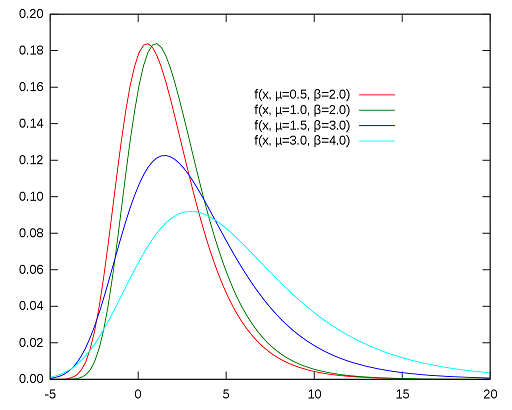

---
---
#Probit and other forms of squashing

The logistic is one among many functions that can squash values between 0 and 1 to turn them into probabilities. Another one is the probit, which uses the expression for the cumulative distribution function (cdf) of the Gaussian. Instead of the logistic "squashing", we use "Gaussian CDF squashing".

Just as the logistic curve induces a Random Utility Model with a Gumbel distribution, the probit induces a RUM with Gaussian distribution.

Compare the squashig of a gaussian cdf with the logistic, below, a picture of the gaussian cdf (for some values of the mean and variance of the gaussian).

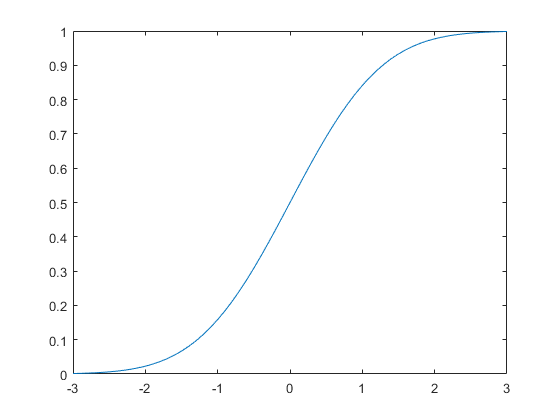

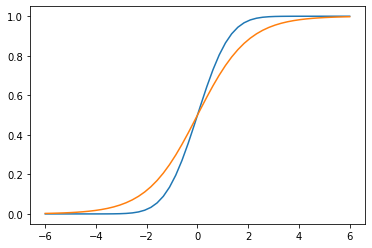

In [ ]:
#@title plot of gaussian cdf (blue) vs logistic (orange), both perform squashing
from scipy.stats import norm

xbase = np.linspace(-6,6)

normy = norm.cdf(xbase)
logisticy = sigmoid(xbase)

plt.plot(xbase, normy)
plt.plot(xbase, logisticy)



And if we scale the gaussian (tune the variance), we can get very close to the logistic. The logistic 'saturates' (goes to 0 or 1) a bit slower relative to a gaussian, when both have the same 'middle part' that loos like linear.

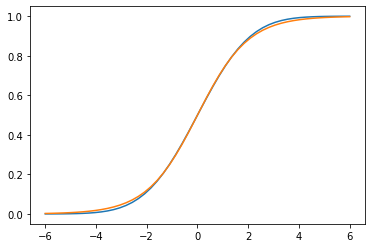

In [ ]:
#@title If we scale the gaussian, we can get very close to the logistic as far as squashing goes
plt.plot(xbase, norm.cdf(0.61*xbase))
plt.plot(xbase, logisticy)


---
---

# Model interpretation

* Population aggregates

* What-if scenarios
* Elasticities
* Partial or Marginal effects
* Willingness to pay


---
---


# Population aggregates

Once we have the estimated the model, we know how to make predictions for individuals.

However, it is very useful to get a picture of the population.

* An example might be to estimate the market share, this can be done by averaging the choice probabilities across all individuals.
* Another useful concept might be to get an idea of the choice probabilities for the average individual.

If we were doing classical linear regression, these two would be the same. For logit models, they are not.

---
---


# What-if scenarios

Another capability of choice models, beyond understanding a given population, is understanding what would happen to choice probabilities if some values of the variables change.

An example is variations on price, when price is a variable that is being measured. What will happen if we increase the price by 50c? What will happen if we reduce the coffee preparation time by 1 minute? Is it worth the effort?

Another example is when the distribution of the population changes, in the example of opening the store in a district, we can use the model to calculate what would be the preferences in that district, for example with older population . Note that this has the underlying assumption that the actual model does not change in this new population, i.e. the relationship between the variables and the choice probabilities remains constant.

The what-if scenarios include almost everything that we can understand about a model, we will highlight two very important ones: elasticity and willingess to pay.

---
---



# Elasticities

The elasticity is defined as the percentage change in the choice probability of an alternative when one of the variables (attributes or characteristics) change by one percent.

The concept of elasticity is often used to understand the reaction of the market to price changes, price being an attribute of the alternative.

Imagine that we now have estimated a model with one of the variables being price.

What will happen to the demand of latte if the price increases by 1%?
* **The demand does not change.** This is what it is called perfectly inelastic situation. The consequence? We can increase the price of our product and expect to get more revenue overall.
* **The demand decreases less than 1%** Relatively inelastic. This means that the impact in demand is less that the upside of increasing the price. So if we increase the price, the revenue will increase.
* **The demand decreases by exactly 1%** Unit elastic. This means that it does not matter the price that we set, the revenue will be the same.
* **The demand decreases by more than 1%, but less than infinite**. Relatively elastic. This means that if we increase the price, the revenue will decrease. If we reduce the price, the revenue will increase.
* **The demand decreases infinitely**. Perfectly elastic. Can you guess this one?

Important, the demand increase is measured relative to the currect percentage, so increasing a demand of 50% by 1% is 50.5%, not 51%.

To calculate the elasticity over a population, we should calculate the individual elasticities, but **weight them by the respective choice probabilities of those individuals**.

When we measure the change of demand in one alternative with respect to a change in an attribute of **other** alternative, the term is **cross-elasticity**.

The following figure taken from the book Applied Choice Analysis summarizes
the concept of elasticity as related to price.

NOTE: that elasticity does not neccesarily has to be applied to price, it can be applied to any measured variable.

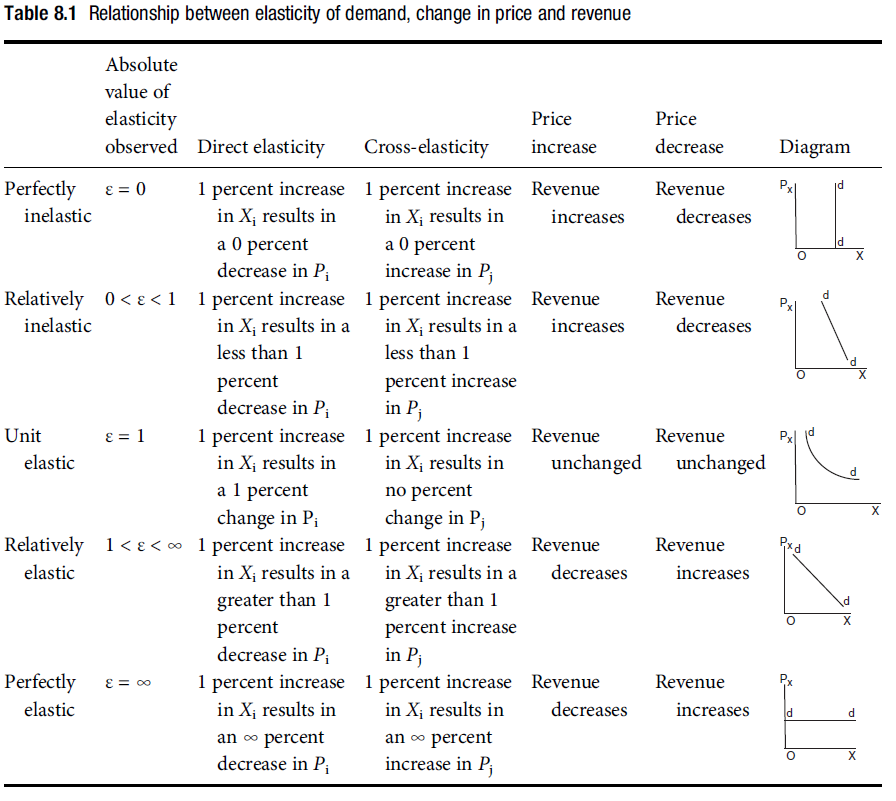

---
---

# Partial or Marginal effects

Marginal effects are defined ast the derivative of the choice probability with respect to one of the measured variables. It expresses the change in probability when one of the variables changes by one unit.

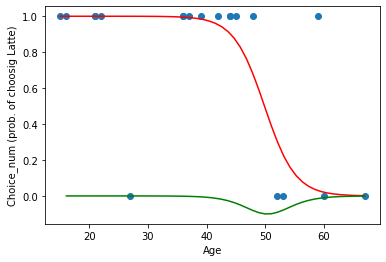

In [ ]:
#@title logit model and marginal effect of age
plt.scatter(age, choice_num)
plt.xlabel('Age')
plt.ylabel('Choice_num (prob. of choosig Latte)')
plt.plot(base, preds_sig, c='red')
plt.plot(base[1:], np.diff(preds_sig), c='green')


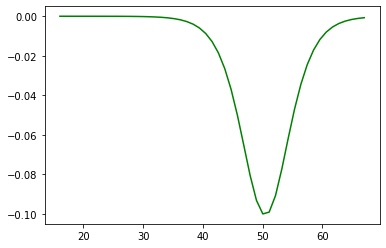

In [ ]:
#@title Focus on the marginal effect
plt.plot(base[1:], np.diff(preds_sig), c='green')

---
---

# Willingness to pay

Another important piece of information to extract from the choice model.
This concept is specific to models that have a price or cost linked to the alternatives.
Willingess to pay is defined as the amount of increased cost that keeps the utility unchanged when there is an improvement in one of the other variables.

For example imagine that our model now has the variables price, serving time and age. If the serving time decreases, the individuals have to wait less time so the utility increases. If we increase the price, the utility decreases.
What is the price value that counteracts the effect of improving the serving time by one unit?

Willingess to pay is a measure of the trade-off between a variables of the model and the cost of the alternative.

The common definition of Willingness to pay in the logit is the ratio of the coefficient of the variable of interest divided by the coefficient for the price variable.
Lets say the vector $\beta$ is the vector of all estimated coefficients:
$$WTP_{\text{variable of interest}} = \frac{\beta_{\text{variable of interest}}}{\beta_{cost}}$$

More generally, the willingness to pay is the ratio of the derivatives of the utility with respect to teh variable of interest and cost.

$$WTP_{\text{variable of interest}} = \frac{ \frac{ \partial V_{nj}} { \partial \text{variable of interest}} } {  \frac{ \partial V_{nj}} { \partial \text{cost}}}$$

---
---

# Model validation

How do I know if the model that we have estimated is good?

* **Comparing likelihoods:** We often want to compare if the model that we are estimating, that is more complex that a 'reference', is significativelly better than the reference.  The likelihood that we calculated to estimate the model is used for hypothesis testing.
 The idea is to compare the likelihood  of the model we estimate with a 'reference model'. Denoting by $L$ the likelihood of a model:
 $$2 \left( \log(L_{model}) - \log(L_{\text{reference model}}) \right) $$ is distributed as a Chi-squared with degrees of freedom equal to the difference in the number of parameters between the estimated model and the reference model. The reference model has to have less parameters than the one we estimate. This is commonly known as the **likelihood ratio test**.

The standard 'reference model' is the one that assign 0 to all coefficients, but we can use any reference model. The 'reference model' must be simpler than the one we estimate, and the models should be 'nested', meaning that the one we estimate must be an extension of the reference, adding parameters. So all parameters of the reference must be included in the one we estimate (though we usually add more parameters).

An example when we want to test if introducing a certain variable makes the model better, if the test rejects the null we can say that.

* **McFadden Pseudo R squared:**
   In an attempt to get a summarization of the fit of a model similar to the $R^2$ in linear regression we have the $\text{Pseudo }R^2 = 1 - \frac{\log(L_{model})}{\log(L_{\text{reference model}})}$
* **Accuracy score:** Another way of comparing models is to compare how many times each model predicts correctly. The predictions of choice probabilities are transformed into pure choices by assuming that the alternative with the largest probability is the one that will be chosen. The predictions are compared against the actual choices in a dataset that was not used to estimate the model (the test set). We should be careful when interpreting this results, because it does not guarantee that the actual probabilities are more precise, and that might be important for example when calculating aggregated values such as the market share.
* **Hypothesis tests for parameters:** We can use the likelihood ratio test for individual paremeters. The test that are used in linear regression are also available (the t-test).
---
---